Team 18  
Elisa Hurt  
Rosa Muilu  
Sahir Dhanani Enarth


# Document Analysis and Summarization System

##Deadline
**Friday January 24 by 23:59 at the latest**. Please do not submit your assignment after the deadline as late submissions will not be graded.

## Learning Objectives:

* Work with text data in Python
* Understand basic text preprocessing
* Use simple APIs for text analysis
* Collaborate on a coding project
* Create a basic command-line interface

## Project Description:
Your team of 4 will build a Python program that helps analyze and summarize documents. The program should:

** Session 1 (~ 3 hours):


* Read and preprocess text files
* Calculate basic text statistics (word count, sentence count, average word length)
* Find most common words and phrases
* Generate and show 3 word clouds


** Session 2 (~ 3 hours):


* Use the Hugging Face Transformers library (https://huggingface.co/docs/hub/en/transformers) to: Generate summaries of the news articles.

* Create a simple command-line interface to run all analyses
* Save dataframe into a CSV file

**Please note that I suggest the time that the assignment might take you. This is a mere guide and does not mean that is all the time you have. Take the time that you need**

## Use the following News Articles Dataset:

BBC News Dataset: https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
Contains ~2000 news articles in 5 categories. For your task, please use the column '**Content**' of this dataset. Use a sample of 500 news articles. Make sure your sample contains articles from all 5 categories.

## Deliverable
One self contained fully functional Notebook. Please send only the Notebook as your submission.

In [1]:
# TODO: Import required libraries
# Hint: You'll need nltk, pandas, matplotlib, wordcloud, and transformers
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
from transformers import pipeline


# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

C:\Users\Sahir\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sahir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
class DocumentAnalyzer:
    def __init__(self):
        """Initialize the DocumentAnalyzer with necessary resources"""
        # TODO: Initialize stop words and the summarization pipeline
        self.stop_words = set(stopwords.words('english'))  # Initialize stopwords
        self.summarizer = self.summarizer = pipeline("summarization", model="facebook/bart-large-cnn")  # Initialize the summarization pipeline

    def process_dataframe(self, df, text_column):
        """Process text data from a pandas DataFrame column

        Args:
            df (pd.DataFrame): Input DataFrame
            text_column (str): Name of the column containing text data

        Returns:
            pd.DataFrame: DataFrame with added analysis columns
        """
        # TODO: Implement DataFrame processing
        # 1. Read the 500 BBC news articles into the DataFrame. According to your selection criteria.
        # 2. Apply text analysis functions to the 'content' column
        # 3. Add and populate a new column for each of the following results: number of sentences (num_sentences), number of words (num_words),
        #    average word length (avg_word_length), average sentence length (avg_sentence_length), top 10 most common words (common_words),
        #    top 5 most common phrases (of lenght 2, i.e., two words),
        #    Note: you have to make these calculations for each of the 500 news articles. Only use the 'content' column.
        # 4. Handle errors appropriately
        df = df.sample(500)
        df.reset_index(inplace=True)
        
        # Apply basic_stats to each row and convert results to DataFrame
        stats_df = pd.DataFrame(df[text_column].apply(self.basic_stats).tolist())
        
        
        df[['num_sentences', 'num_words', 'avg_word_length', 'avg_sentence_length', 'common_words', 'common_phrases']] = stats_df[['num_sentences', 'num_words', 'avg_word_length', 'avg_sentence_length', 'common_words', 'common_phrases']]
        
        return df

    def basic_stats(self, text):
        """Calculate basic text statistics"""
        # TODO: Calculate and return a dictionary containing:
        # - Number of sentences (num_sentences)

        sentences = [sentence.strip() for sentence in re.split('[.!?]', text) if sentence.strip()]  # splits the text based on periods, exclamation marks, and question marks
        num_sentences = len(sentences)

        # - Number of words (num_words)
        words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in text.split()] # remove non-alphanumeric
        words = [word for word in words if word] # remove empty strings
        num_words = len(words)

        # - Average word length (avg_word_length)
        avg_word_length = sum(len(word) for word in words) / num_words if num_words > 0 else 0 # takes the sum of the length of all the words, divide by the amount of total words to get the average

        # - Average sentence length (avg_sentence_length)
        avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0

        # Get common words and phrases
        common_words = [word for word, count in self.get_common_words(text)]
        
        common_phrases = [' '.join(phrase) for phrase, count in self.get_common_phrases(text)]

        # Create a dicionary
        stats = {
            'num_sentences': num_sentences,
            'num_words': num_words,
            'avg_word_length': avg_word_length,
            'avg_sentence_length': avg_sentence_length,
            'common_words': common_words,
            'common_phrases': common_phrases
        }

        

        return stats

    def get_common_words(self, text, n=10):
        """Find the n most common words in the text"""
        # TODO: Implement word frequency analysis
        # Remember to:
        # 1. Tokenize the text
        # 2. Convert to lowercase
        # 3. Remove stopwords

        text_lowercase = text.lower()
        words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in text_lowercase.split()] # remove non-alphanumeric
        text_tokens = [word for word in words if word] # remove empty strings
        preprocessed_text = []
        for word in text_tokens:
            if word not in self.stop_words:
                preprocessed_text.append(word)

        # 4. Count frequencies
        word_counts = Counter(preprocessed_text)
        most_common_words = word_counts.most_common(n)
        return most_common_words


    def get_common_phrases(self, text, n=5, phrase_length=2):
        """Find the n most common phrases of specified length"""
        # TODO: Implement phrase frequency analysis using nltk.util.ngrams
        text_lowercase = text.lower()
        words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in text_lowercase.split()] # remove non-alphanumeric
        text_tokens = [word for word in words if word] # remove empty strings
        preprocessed_text = []
        for word in text_tokens:
            if word not in self.stop_words:
                preprocessed_text.append(word)

        # Phrase frequencies
        phrases = ngrams(preprocessed_text, phrase_length)
        phrase_counts = Counter(phrases)
        most_common_phrases = phrase_counts.most_common(n)
        return most_common_phrases

    def create_wordcloud(self, text, output_file='wordcloud.png'):
        """Generate and save a word cloud visualization"""
        # TODO: Create and show word cloud visualizations of the most common words for 3 randomly selected news articles.
        # Use WordCloud class and matplotlib
        
        common_words = self.get_common_words(text)
        word_freq_dict = {word: freq for word, freq in common_words}

        wordcloud = WordCloud(
            width=800, height=400,
            background_color='white',
            max_words=len(common_words),
            random_state=42
        ).generate_from_frequencies(word_freq_dict)

        # Plotting the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud')
        plt.tight_layout()
        
        # Saving the word cloud image
        plt.savefig(output_file)
        plt.show()

    def generate_summary(self, text, max_length=50, min_length=30):
        """Generate a summary using the BART model"""
        # TODO: Implement text summarization
        # Remember to:
        # 1. Handle long texts by splitting into chunks
        # 2. Use the summarization pipeline
        # 3. Combine summaries if needed
        
        chunks = self._split_into_chunks(text)

        # Generating summaries for each chunk
        summaries = []
        for chunk in chunks:
            summary = self.summarizer(chunk, max_length=max_length, min_length=min_length, truncation=True)
            summaries.append(summary[0]['summary_text'])

        # Combining all chunk summaries into a single summary
        combined_summary = " ".join(summaries)
        return combined_summary

    def _split_into_chunks(self, text, max_chunk_size=1000):
        """Helper method to split text into chunks for summarization"""
        # TODO: Implement text splitting into chunks
        # This is needed because the summarizer has a maximum input length

        # Splitting text into sentences
        sentences = text.split('. ')
        chunks = []
        current_chunk = []

        # Iterating over sentences and group them into chunks
        for sentence in sentences:
            if len(' '.join(current_chunk) + ' ' + sentence) <= max_chunk_size:
                current_chunk.append(sentence)
            else:
                chunks.append(' '.join(current_chunk))
                current_chunk = [sentence]
        
        # Add the last chunk (if any sentences are left)
        if current_chunk:
            chunks.append(' '.join(current_chunk))

        return chunks

    def save_analysis(self, filepath, analysis_results):
        """Save analysis results to a CSV file"""
        # TODO: Implement saving dataframe to a CSV file
        analysis_results.to_csv(filepath, index=False)
        

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


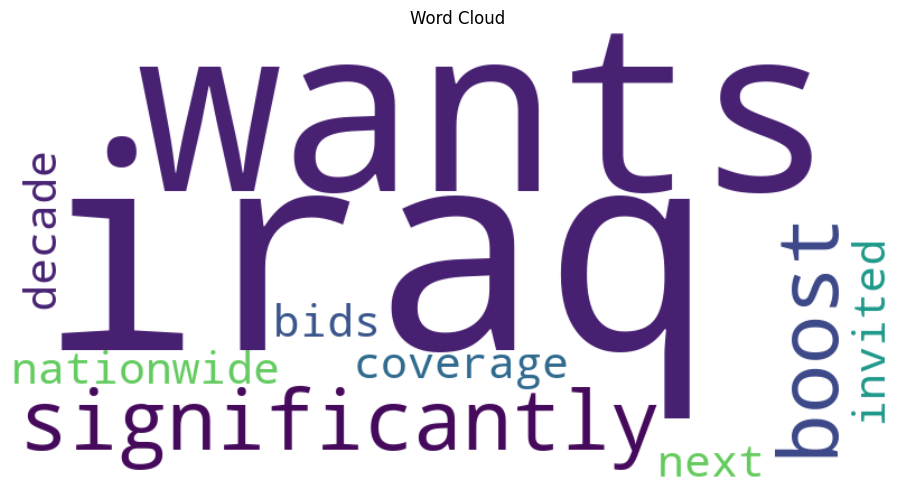

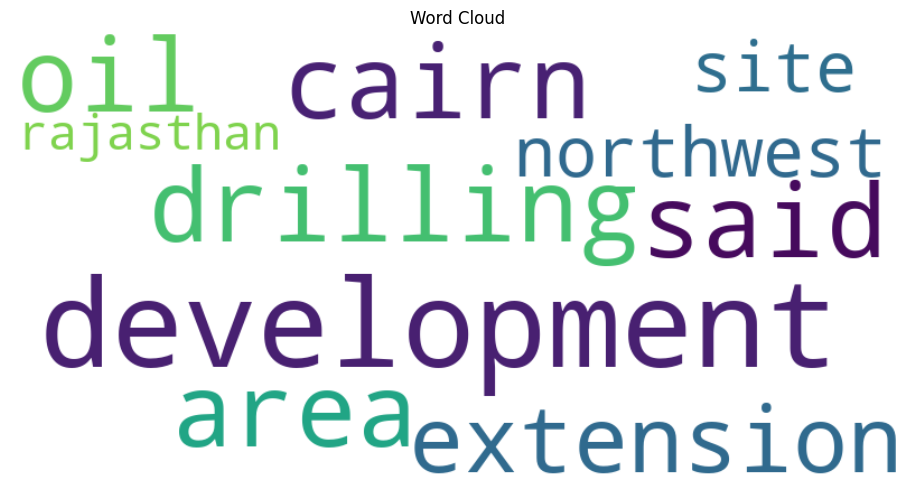

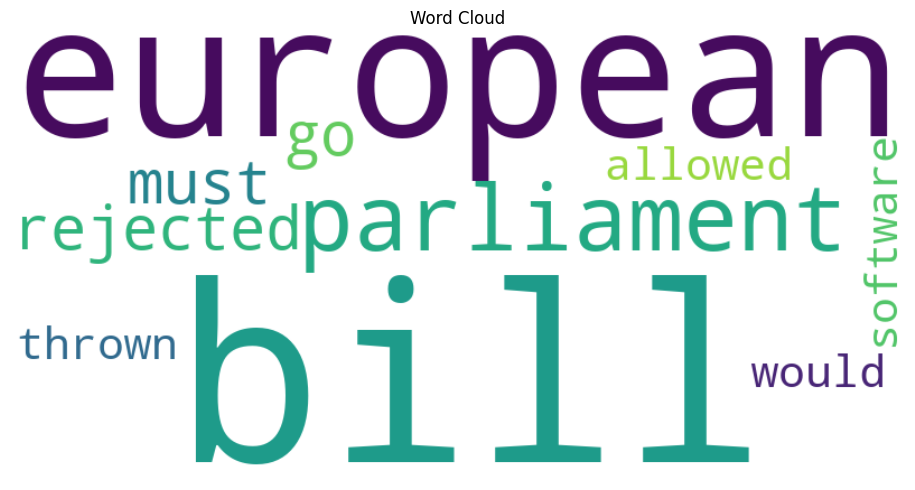

Your max_length is set to 50, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


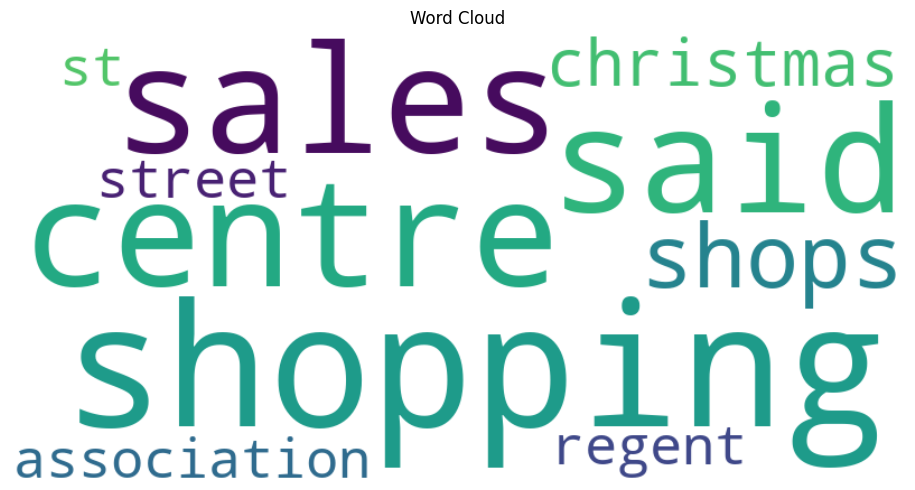

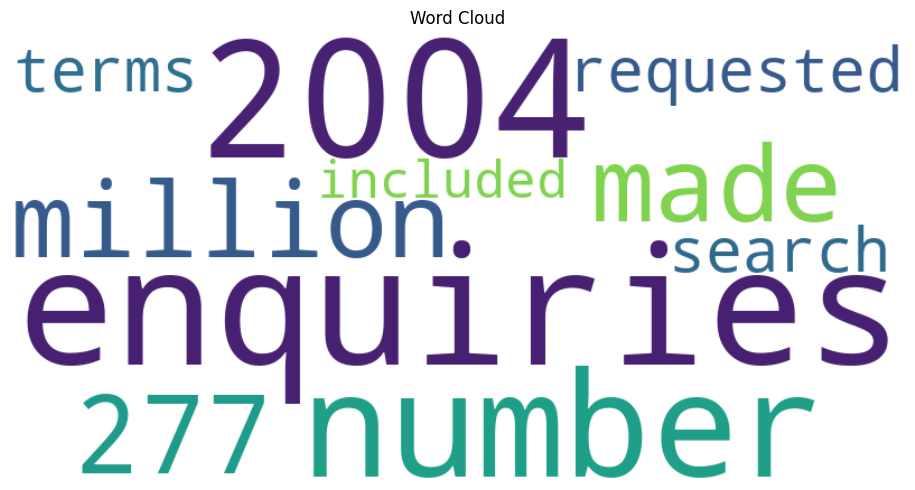

In [3]:
def main():
    # TODO: Implement the main function that:
    # 1. Initializes the analyzer
    # 2. Populates the DataFrame with 500 BBC news articles
    # 3. Processes the DataFrame
    # 4. Generates worldclouds for 5 random summaries
    # 5. Saves the resulting updated dataframe to CSV

    # Hint: Start by loading your 500 news articles into a dataframe. Make sure to include the code to select those 500 news articles.
    filepath = 'bbc-news-data.csv' #path_to_data_file - Replace with your text file
    df = pd.DataFrame(pd.read_csv(filepath, sep='	', engine='python'))
    
    # 1. Initializing the analyzer
    analyzer = DocumentAnalyzer()

    # 2 & 3. Processing the data includes sampling 500 random articles
    processed_df = analyzer.process_dataframe(df, 'content')

    # 4. wordclouds - first pick 5 random
    random_articles = df['content'].sample(5)

    # Generating word clouds for the summaries of the 5 random articles
    for i, text in enumerate(random_articles, 1):
        # Generate the summary
        summary = analyzer.generate_summary(text)

        # Create and save a word cloud for the summary
        output_file = f'wordcloud_summary_{i}.png'
        analyzer.create_wordcloud(summary, output_file=output_file)

    # 5. save CSVs
    # Save the processed DataFrame to a CSV file
    output_filepath = 'processed_news_articles.csv'
    analyzer.save_analysis(output_filepath, processed_df)


if __name__ == "__main__":
    main()



In [4]:
# Testing functions
def run_tests():
    # Test DocumentAnalyzer class functionality
    analyzer = DocumentAnalyzer()
    
    # Test with a simple article
    test_text = "test article. This is a test article! I like a nice test article!"
    
    # Test basic functionality
    stats = analyzer.basic_stats(test_text)
    assert stats['num_sentences'] == 3
    assert stats['num_words'] == 13
    
    # Test common words and phrases
    common_words = analyzer.get_common_words(test_text)
    assert isinstance(common_words, list)
    assert len(common_words) <= 10
    
    common_phrases = analyzer.get_common_phrases(test_text)
    assert isinstance(common_phrases, list)
    assert len(common_phrases) <= 5
    
    # Test summary generation
    summary = analyzer.generate_summary(test_text)
    assert isinstance(summary, str)

run_tests()


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Your max_length is set to 50, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
